# Exploratory data analysis of Titanic dataset

## IPython magics

In [62]:
%matplotlib inline

## Imports

In [63]:
import importlib
import os
import time
import re
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns; sns.set()
import titanic.exploratory_data_analysis as eda
importlib.reload(eda)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = -1

plt.rcParams['figure.figsize'] = [15, 4.5]

## Load data

In [64]:
train = pd.read_csv('../data/raw/train.csv')
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [65]:
train.info()
print('train.shape:', train.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
train.shape: (891, 12)


In [66]:
data_dict = pd.read_excel('../references/data_dict.xlsx')
data_dict

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,"Ticket class. A proxy for socio-economic status (SES). 1st = Upper, 2nd = Middle, 3rd = Lower.","1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,NaN
3,Age,"Age in years. Age is fractional if less than 1. If the age is estimated, it is in the form of xx.5.",NaN
4,sibsp,"# of siblings / spouses aboard the Titanic. The dataset defines family relations in this way: Sibling = brother, sister, stepbrother, stepsister; Spouse = husband, wife (mistresses and fiancés were ignored).",NaN
5,parch,"# of parents / children aboard the Titanic. The dataset defines family relations in this way: Parent = mother, father; Child = daughter, son, stepdaughter, stepson; Some children travelled only with a nanny, therefore parch=0 for them.",NaN
6,ticket,Ticket number,NaN
7,fare,Passenger fare,NaN
8,cabin,Cabin number,NaN
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


## Missing values

In [67]:
importlib.reload(eda)
eda.get_nan_counts(train)

,Feature,NaN count,NaN percentage
0,Cabin,687,0.771044
1,Age,177,0.198653
2,Embarked,2,0.002245
3,PassengerId,0,0.000000
4,Survived,0,0.000000
5,Pclass,0,0.000000
6,Name,0,0.000000
7,Sex,0,0.000000
8,SibSp,0,0.000000
9,Parch,0,0.000000


## Survived

In [68]:
eda.get_count_percentage(train, 'Survived', sort='count')

,Survived,Count,Percentage
0,0,549,0.616162
1,1,342,0.383838


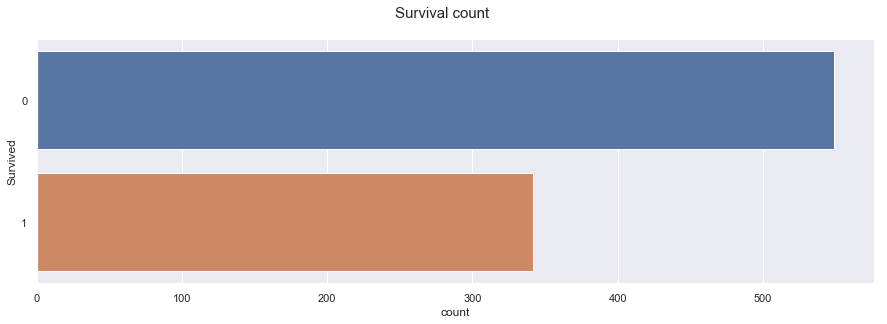

In [69]:
sns.countplot(y='Survived', data=train)
plt.gcf().suptitle('Survival count', fontsize=15);

## Pclass

In [70]:
eda.get_count_percentage(train, 'Pclass')

,Pclass,Count,Percentage
0,3,491,0.551066
1,1,216,0.242424
2,2,184,0.206510


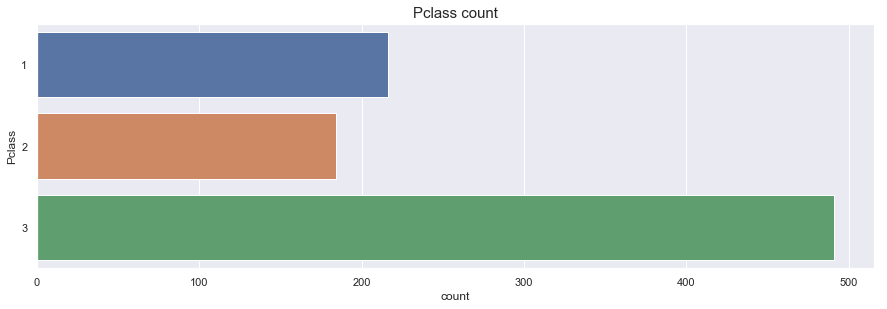

In [71]:
sns.countplot(y='Pclass', data=train)
plt.gca().set_title('Pclass count', fontsize=15);

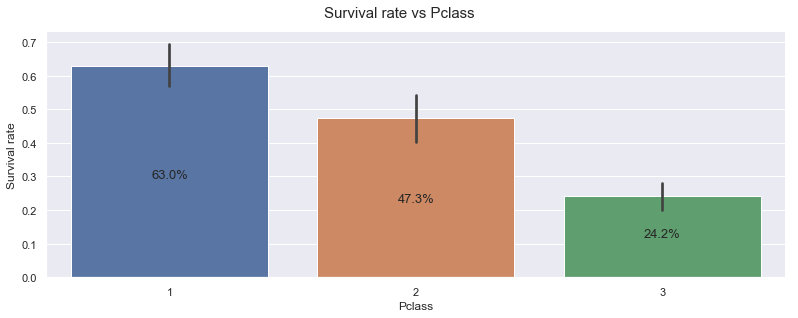

In [72]:
g = sns.catplot(x="Pclass", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Pclass', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

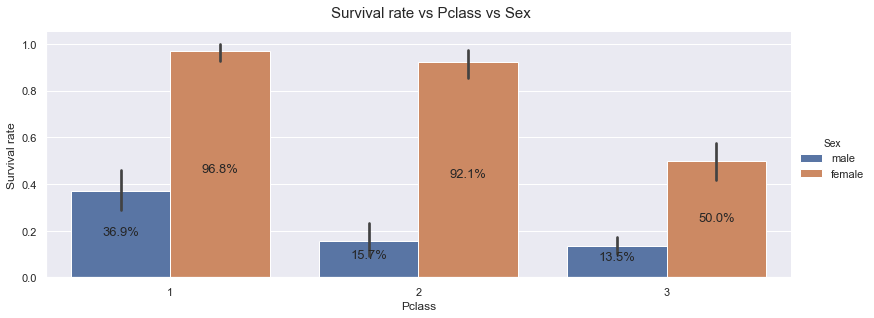

In [73]:
g = sns.catplot(x="Pclass", y="Survived", hue='Sex', data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5)
g.fig.suptitle('Survival rate vs Pclass vs Sex', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## Title

In [74]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [75]:
train['Title'].replace('Mlle', 'Miss', inplace=True)
train['Title'].replace('Ms', 'Miss', inplace=True)
train['Title'].replace('Mme', 'Mrs', inplace=True)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [76]:
title_other_filter = ~train['Title'].isin(['Mr', 'Master', 'Mrs', 'Miss'])
train.loc[title_other_filter, 'Title'] = 'Other'
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Other,3,20


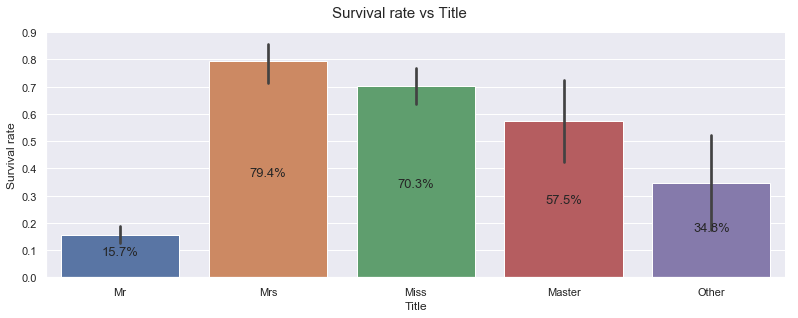

In [77]:
g = sns.catplot(x="Title", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Title', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## Sex

In [78]:
eda.get_count_percentage(train, 'Sex')

,Sex,Count,Percentage
0,male,577,0.647587
1,female,314,0.352413


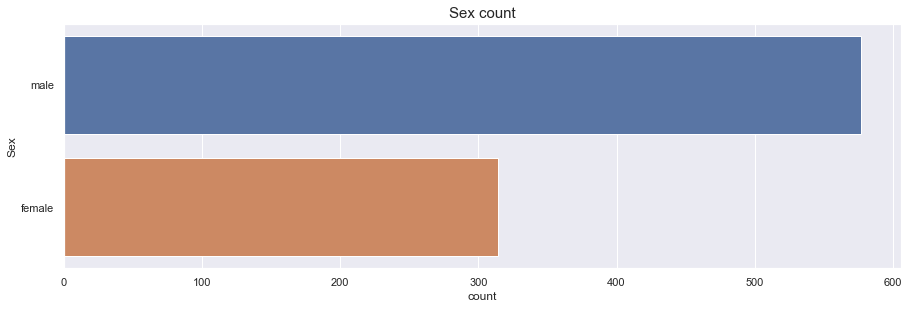

In [79]:
sns.countplot(y='Sex', data=train)
plt.gca().set_title('Sex count', fontsize=15);

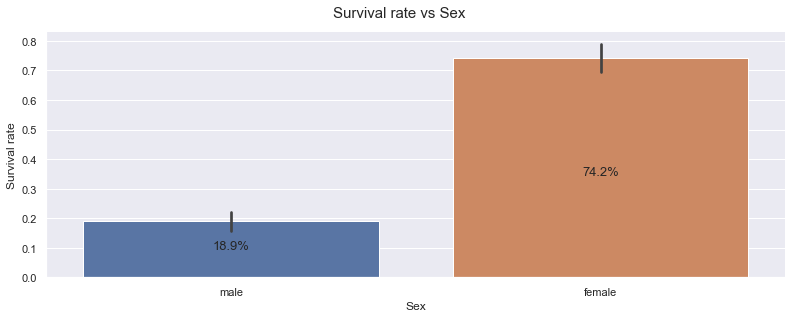

In [80]:
g = sns.catplot(x="Sex", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Sex', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## SibSp

In [81]:
eda.get_count_percentage(train, 'SibSp')

,SibSp,Count,Percentage
0,0,608,0.682379
1,1,209,0.234568
2,2,28,0.031425
3,4,18,0.020202
4,3,16,0.017957
5,8,7,0.007856
6,5,5,0.005612


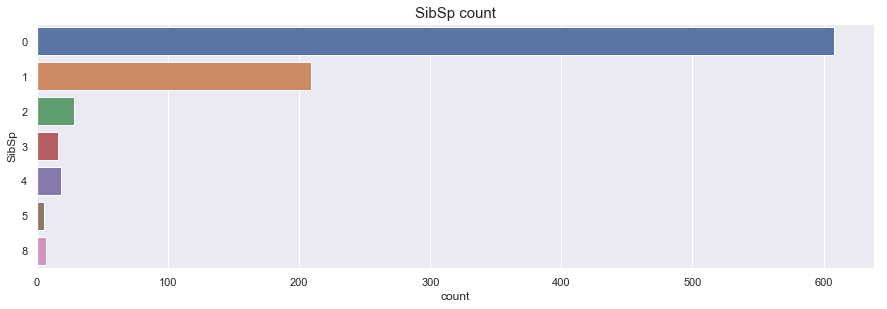

In [82]:
sns.countplot(y='SibSp', data=train)
plt.gca().set_title('SibSp count', fontsize=15);

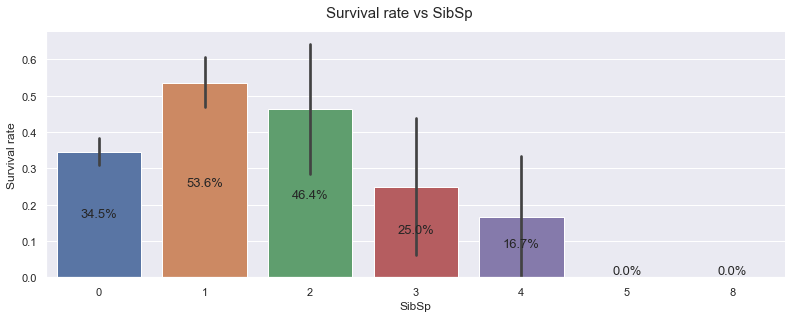

In [83]:
g = sns.catplot(x="SibSp", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs SibSp', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## Parch

In [84]:
eda.get_count_percentage(train, 'Parch')

,Parch,Count,Percentage
0,0,678,0.760943
1,1,118,0.132435
2,2,80,0.089787
3,5,5,0.005612
4,3,5,0.005612
5,4,4,0.004489
6,6,1,0.001122


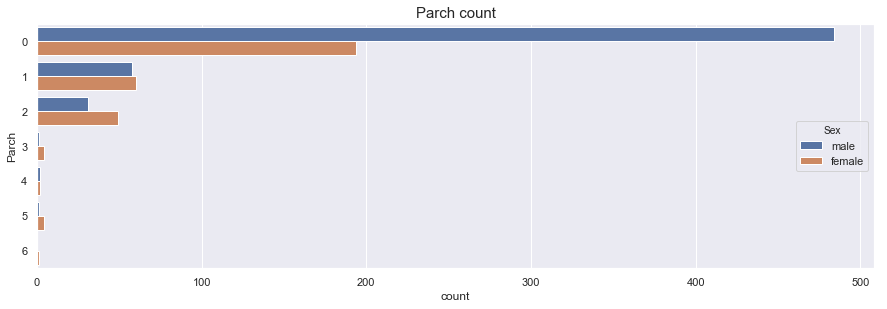

In [85]:
sns.countplot(y='Parch', hue='Sex', data=train)
plt.gca().set_title('Parch count', fontsize=15);

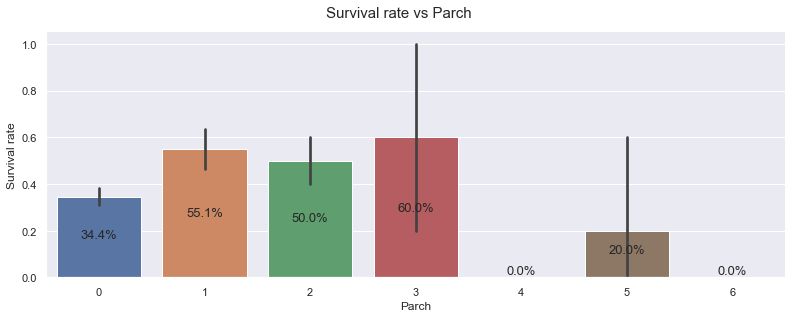

In [86]:
g = sns.catplot(x="Parch", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Parch', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## FamilySize

In [87]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
eda.get_count_percentage(train, 'FamilySize')

,FamilySize,Count,Percentage
0,1,537,0.602694
1,2,161,0.180696
2,3,102,0.114478
3,4,29,0.032548
4,6,22,0.024691
5,5,15,0.016835
6,7,12,0.013468
7,11,7,0.007856
8,8,6,0.006734


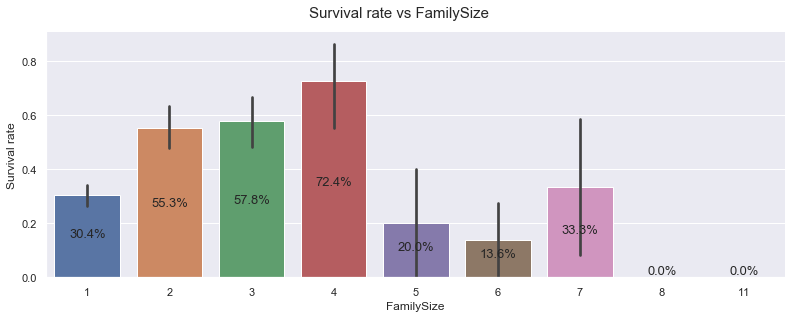

In [88]:
g = sns.catplot(x="FamilySize", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs FamilySize', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## Embarked

In [89]:
eda.get_count_percentage(train, 'Embarked')

,Embarked,Count,Percentage
0,S,644,0.724409
1,C,168,0.188976
2,Q,77,0.086614


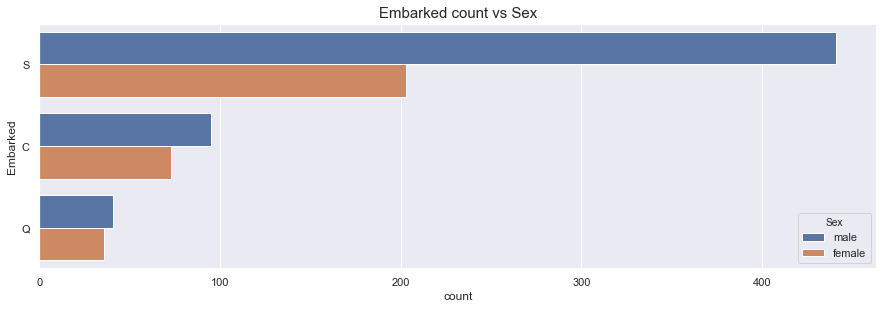

In [90]:
sns.countplot(y='Embarked', hue='Sex', data=train)
plt.gca().set_title('Embarked count vs Sex', fontsize=15);

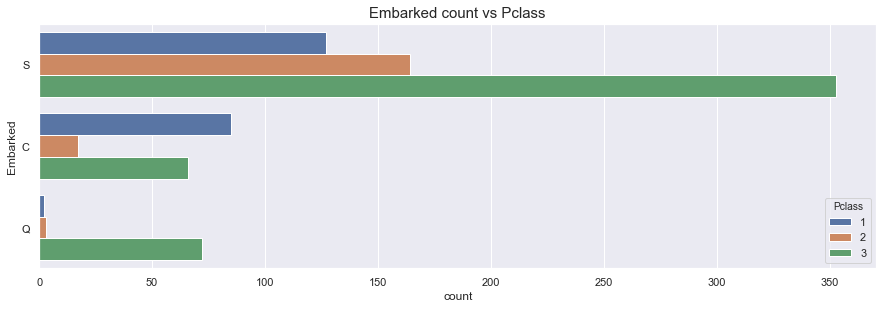

In [91]:
sns.countplot(y='Embarked', hue='Pclass', data=train)
plt.gca().set_title('Embarked count vs Pclass', fontsize=15);

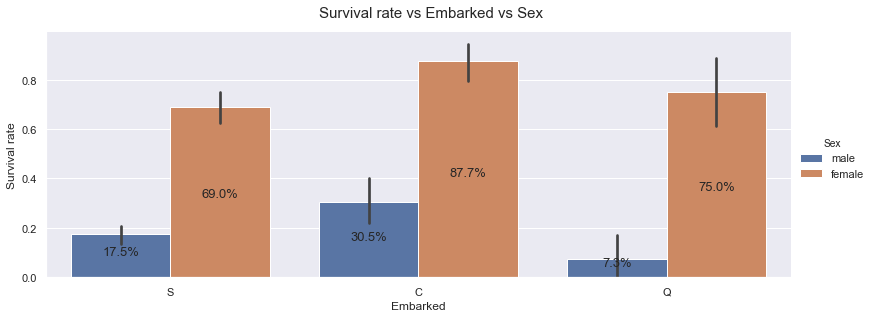

In [92]:
g = sns.catplot(x="Embarked", y="Survived", hue='Sex', data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Embarked vs Sex', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

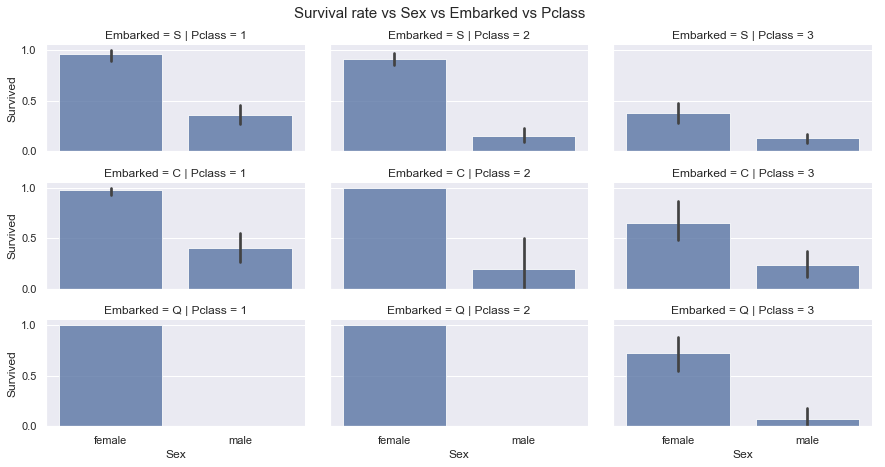

In [93]:
g = sns.FacetGrid(train, row='Embarked', col='Pclass', height=2.2, aspect=1.9)
g.map(sns.barplot, 'Sex', 'Survived', alpha=0.8, order=['female', 'male'])
g.fig.subplots_adjust(top=.9)
plt.gcf().suptitle('Survival rate vs Sex vs Embarked vs Pclass', fontsize=15);

## Deck

In [94]:
has_cabin = train.loc[~train['Cabin'].isnull(), :]
has_cabin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss,3
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss,1


In [95]:
eda.get_count_percentage(has_cabin, 'Pclass')

,Pclass,Count,Percentage
0,1,176,0.862745
1,2,16,0.078431
2,3,12,0.058824


In [96]:
eda.get_count_percentage(has_cabin, 'Sex')

,Sex,Count,Percentage
0,male,107,0.52451
1,female,97,0.47549


In [97]:
deck = train['Cabin'].apply(lambda x: ''.join(re.findall("[a-zA-Z]+", str(x))))
deck.value_counts()

nan     687
C       51 
B       36 
E       32 
D       32 
A       15 
F       9  
BB      7  
CC      4  
CCC     4  
G       4  
FG      3  
BBB     2  
BBBB    2  
T       1  
DD      1  
FE      1  
Name: Cabin, dtype: int64

In [98]:
train['Deck'] = train['Cabin'].str.extract(r'([A-Z])+', expand=False)
train['Deck'].fillna('X', inplace=True)
train['Deck'].value_counts()

X    687
C    59 
B    47 
D    33 
E    32 
A    15 
F    13 
G    4  
T    1  
Name: Deck, dtype: int64

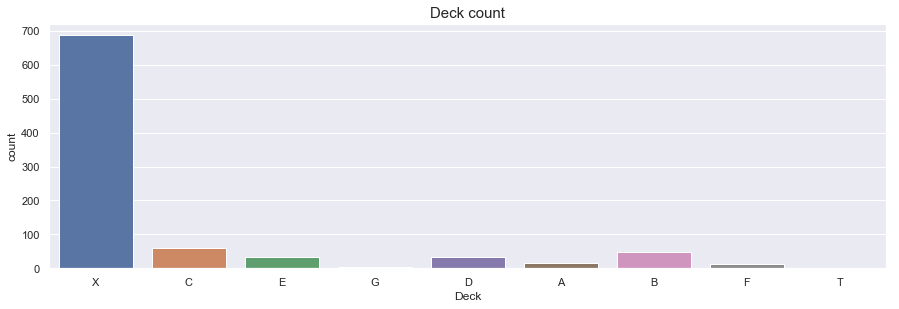

In [99]:
sns.countplot(x='Deck', data=train)
plt.gca().set_title('Deck count', fontsize=15);

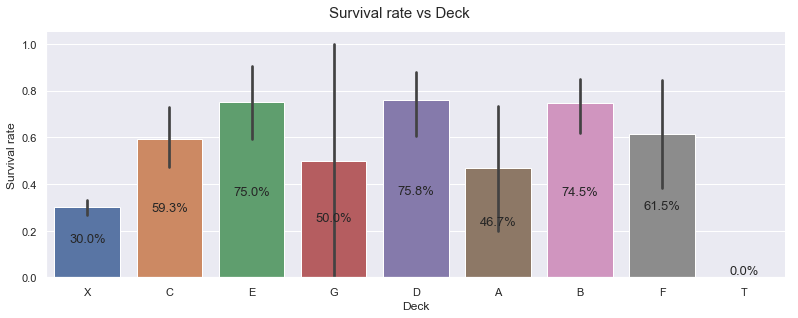

In [100]:
g = sns.catplot(x="Deck", y="Survived", data=train, kind="bar", palette="deep", 
                height=4.5, aspect=2.5, orient='v')
g.fig.suptitle('Survival rate vs Deck', fontsize=15)
g.set_ylabels("Survival rate")
g.fig.subplots_adjust(top=.9)
ax = plt.gca()
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height()/2.2, '{:0.1f}%'.format(p.get_height() * 100), 
            fontsize=13, ha='center', va='bottom')

## Age

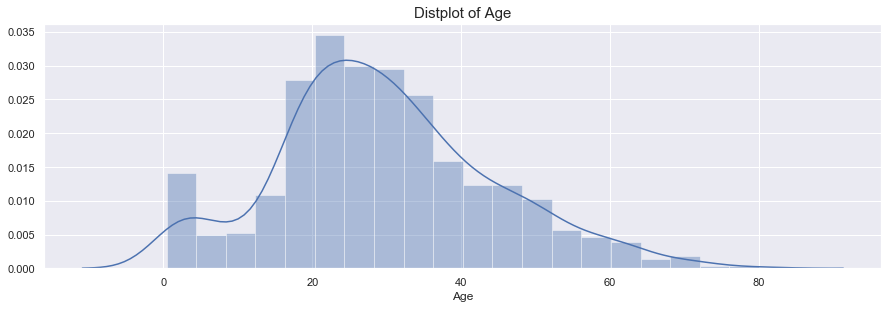

In [101]:
sns.distplot(train['Age'][~train['Age'].isnull()])
plt.gca().set_title('Distplot of Age', fontsize=15);

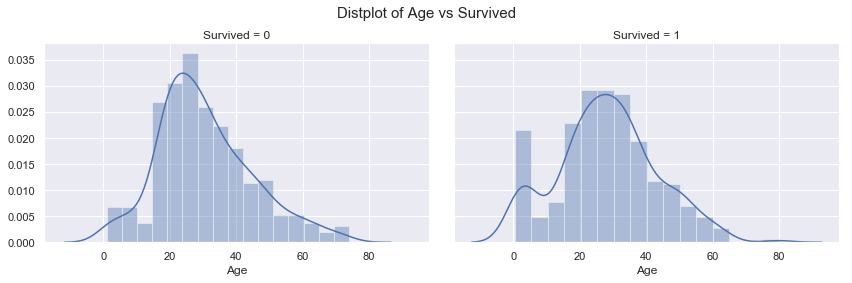

In [102]:
g = sns.FacetGrid(train, col='Survived', height=4, aspect=1.5)
g = g.map(sns.distplot, "Age")
g.fig.subplots_adjust(top=.85)
plt.gcf().suptitle('Distplot of Age vs Survived', fontsize=15);

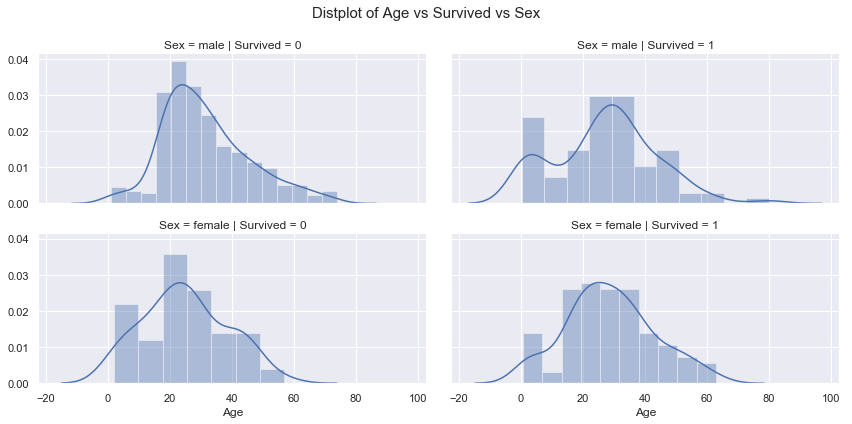

In [103]:
g = sns.FacetGrid(train, row='Sex', col='Survived', height=3, aspect=2)
g = g.map(sns.distplot, "Age")
g.fig.subplots_adjust(top=.87)
plt.gcf().suptitle('Distplot of Age vs Survived vs Sex', fontsize=15);

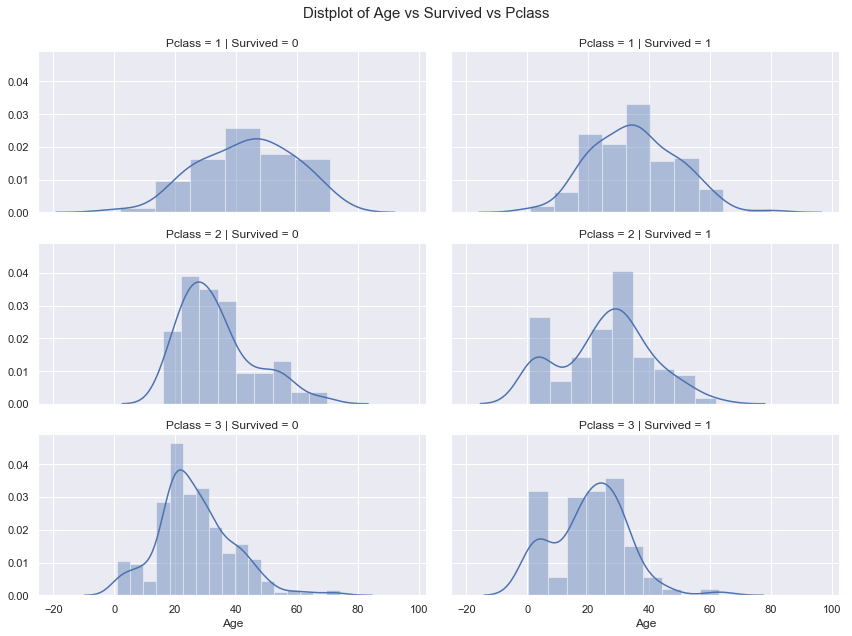

In [104]:
g = sns.FacetGrid(train, row='Pclass', col='Survived', height=3, aspect=2)
g = g.map(sns.distplot, "Age")
g.fig.subplots_adjust(top=.91)
plt.gcf().suptitle('Distplot of Age vs Survived vs Pclass', fontsize=15);

In [105]:
train['Age'].describe()

count    714.000000
mean     29.699118 
std      14.526497 
min      0.420000  
25%      20.125000 
50%      28.000000 
75%      38.000000 
max      80.000000 
Name: Age, dtype: float64

## AgeBin

In [106]:
train['Age'].fillna(train['Age'].median(), inplace=True)
train['AgeBin'] = pd.cut(train['Age'], 10)
eda.get_count_percentage(train, 'AgeBin')

,AgeBin,Count,Percentage
0,"(24.294, 32.252]",346,0.388328
1,"(16.336, 24.294]",177,0.198653
2,"(32.252, 40.21]",118,0.132435
3,"(40.21, 48.168]",70,0.078563
4,"(0.34, 8.378]",54,0.060606
5,"(8.378, 16.336]",46,0.051627
6,"(48.168, 56.126]",45,0.050505
7,"(56.126, 64.084]",24,0.026936
8,"(64.084, 72.042]",9,0.010101
9,"(72.042, 80.0]",2,0.002245


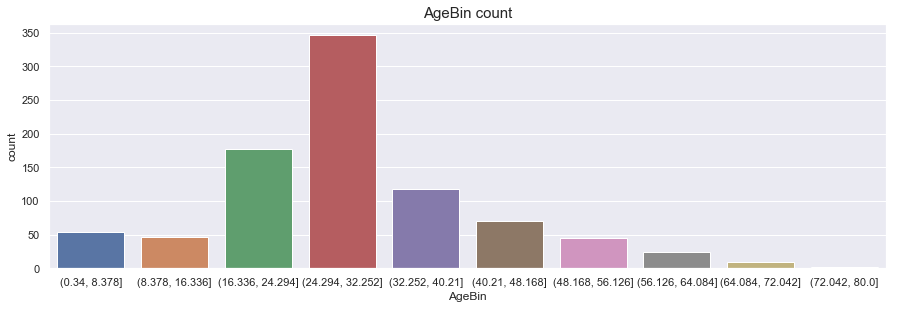

In [107]:
sns.countplot(x='AgeBin', data=train)
plt.gca().set_title('AgeBin count', fontsize=15);

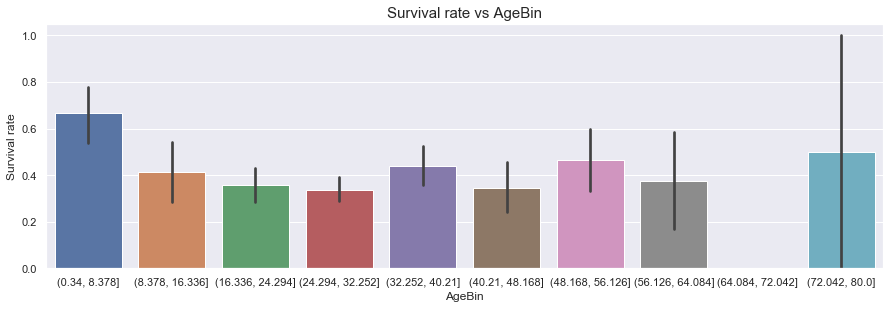

In [108]:
sns.barplot(x='AgeBin', y='Survived', data=train)
plt.gca().set_ylabel('Survival rate')
plt.gca().set_title('Survival rate vs AgeBin', fontsize=15);

## Fare

In [109]:
train['Fare'].describe()

count    891.000000
mean     32.204208 
std      49.693429 
min      0.000000  
25%      7.910400  
50%      14.454200 
75%      31.000000 
max      512.329200
Name: Fare, dtype: float64

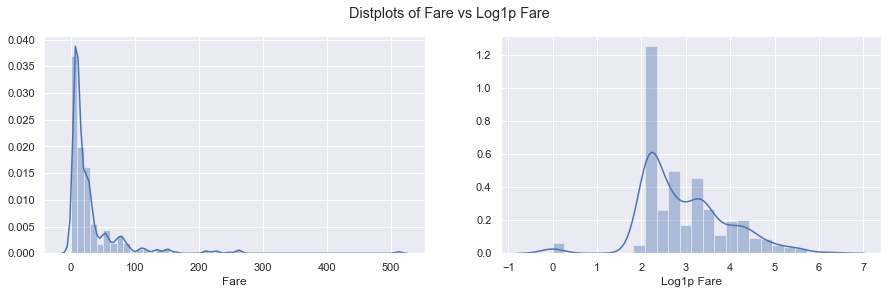

In [110]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[15, 4])
sns.distplot(train['Fare'], ax=ax[0])
sns.distplot(np.log1p(train['Fare']), ax=ax[1], axlabel='Log1p Fare')
fig.suptitle('Distplots of Fare vs Log1p Fare');

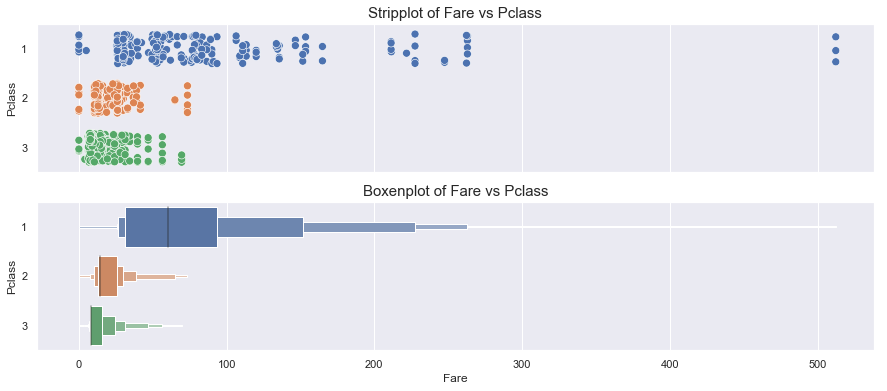

In [111]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=[15, 6])
sns.stripplot(y='Pclass', x='Fare', data=train, ax=ax[0], orient='h', s=8, edgecolor='white', 
                linewidth=0.6, jitter=0.3)
sns.boxenplot(y='Pclass', x='Fare', data=train, ax=ax[1], orient='h')
ax[0].set_xlabel('')
ax[0].set_title('Stripplot of Fare vs Pclass', fontsize=15)
ax[1].set_title('Boxenplot of Fare vs Pclass', fontsize=15);

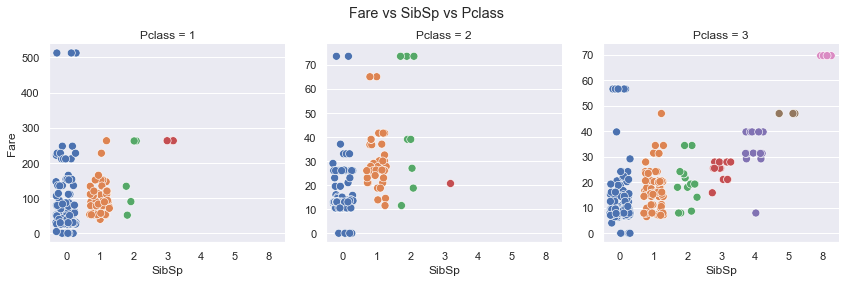

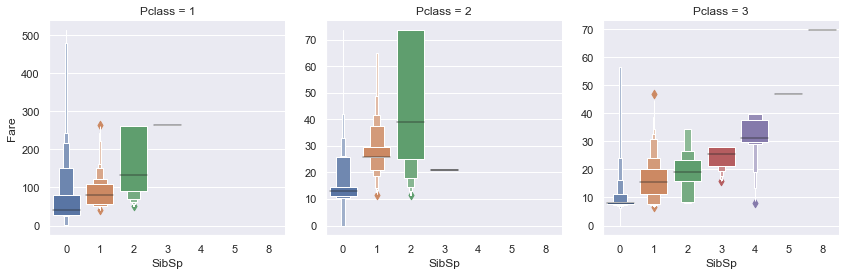

In [112]:
g = sns.catplot(x='SibSp', y='Fare', col='Pclass', data=train, kind='strip', 
                sharey=False, height=4, aspect=1, s=8, edgecolor='white', 
                linewidth=0.6, jitter=0.3)
g.fig.suptitle('Fare vs SibSp vs Pclass')
g.fig.subplots_adjust(top=.85)
sns.catplot(x='SibSp', y='Fare', col='Pclass', data=train, kind='boxen', 
                sharey=False, height=4, aspect=1);

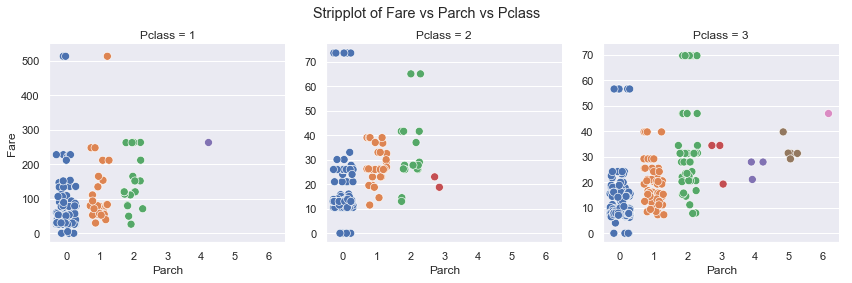

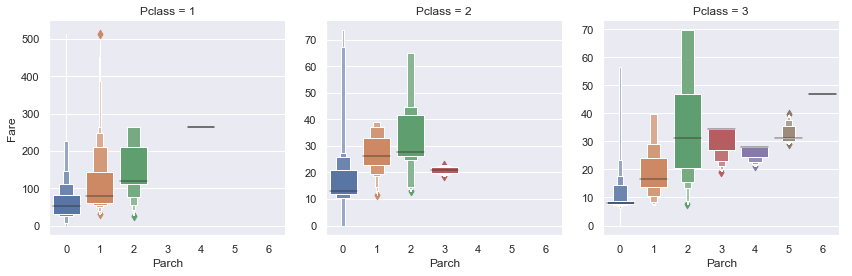

In [113]:
g = sns.catplot(x='Parch', y='Fare', col='Pclass', data=train, kind='strip', 
                sharey=False, height=4, aspect=1, s=8, edgecolor='white', 
                linewidth=0.6, jitter=0.3)
g.fig.suptitle('Stripplot of Fare vs Parch vs Pclass')
g.fig.subplots_adjust(top=.85)
sns.catplot(x='Parch', y='Fare', col='Pclass', data=train, kind='boxen', 
                sharey=False, height=4, aspect=1);

## Correlation

In [114]:
importlib.reload(eda)
eda.association_test(train.loc[:, ['Pclass', 'Sex', 'Age', 'SibSp',
                                   'Parch', 'FamilySize', 'Fare', 'Embarked']], train['Survived'])

,Pearson's r,Spearman's rho,Root R^2,p-value of F
Sex,NaN,NaN,0.543351,1.406066e-69
Pclass,-0.338481,-0.339668,0.338481,2.537047e-25
Fare,0.257307,0.323736,0.257307,6.120189e-15
Embarked,NaN,NaN,0.182484,1.342287e-06
Parch,0.081629,0.138266,0.081629,1.479925e-02
Age,-0.064910,-0.037004,0.064910,5.276069e-02
SibSp,-0.035322,0.088879,0.035322,2.922439e-01
FamilySize,0.016639,0.165463,0.016639,6.198911e-01


In [115]:
train['SexNum'] = train['Sex'].replace({'male': 1, 'female': 0}).astype(int)
train['SexNum'].head()

0    1
1    0
2    0
3    0
4    1
Name: SexNum, dtype: int32

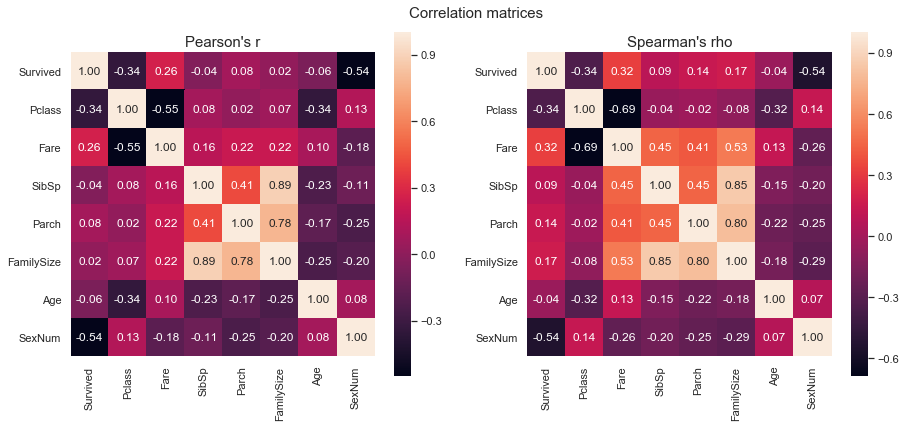

In [116]:
CORR_COLS = ['Survived', 'Pclass', 'Fare', 'SibSp', 'Parch', 'FamilySize', 'Age', 'SexNum']
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))
sns.heatmap(train[CORR_COLS].corr(method='pearson'), 
            ax=ax[0], cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})
sns.heatmap(train[CORR_COLS].corr(method='spearman'), 
            ax=ax[1], cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12})
ax[0].set_title("Pearson's r", fontsize=15)
ax[1].set_title("Spearman's rho", fontsize=15)
fig.suptitle("Correlation matrices", fontsize=15)
fig.subplots_adjust(top=.92);

## Save as .py

In [117]:
!jupyter nbconvert --to script 01_exploratory_data_analysis.ipynb

[NbConvertApp] Converting notebook 01_exploratory_data_analysis.ipynb to script
[NbConvertApp] Writing 11728 bytes to 01_exploratory_data_analysis.py
